In [1]:
# !pip install pyparsing==2.4.6
# !pip install tensorflow

In [3]:
import sys
sys.path.append("../utils/") 
from utilities import performance_metrics
import time

from src.core import Term, Atom
from src.ilp import Language_Frame, Program_Template, Rule_Template
from src.dilp import DILP
import tensorflow as tf
import numpy as np
from src.utils import process_file, process_dir, create_table, output_rules, test_rule, train, test
from src.generate_template import create_templates
import duckdb
tf.random.set_seed(1000)
np.random.seed(1000)

import dill


2024-06-20 09:24:44.130458: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 09:24:45.197257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# arity 1
term_x_0 = Term(True, 'X_0')

In [5]:
con = duckdb.connect(':memory:')
# enable automatic query parallelization
con.execute("PRAGMA threads=2")
# enable caching of parquet metadata
con.execute("PRAGMA enable_object_cache")

Performance of symbolic rule performance of full train set
Accuracy: 0.999333
Precision TP/(TP+FP): 0.981258
Recall TP/(TP+FN): 0.493188
F1 Score: 0.656442
MCC Score: 0.695420
previous table dropped
Performance of symbolic rule performance of full test set
Accuracy: 0.999326
Precision TP/(TP+FP): 0.984448
Recall TP/(TP+FN): 0.501188
F1 Score: 0.664218
MCC Score: 0.702175


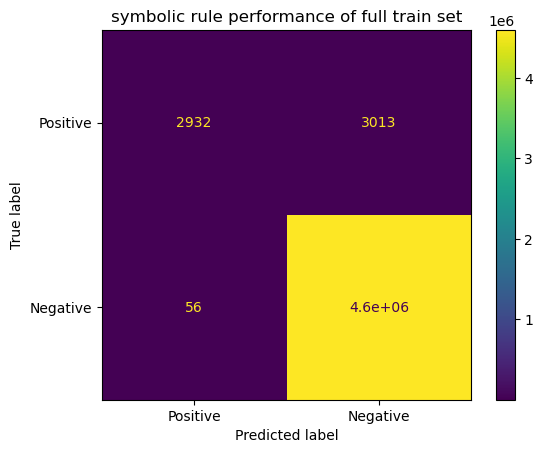

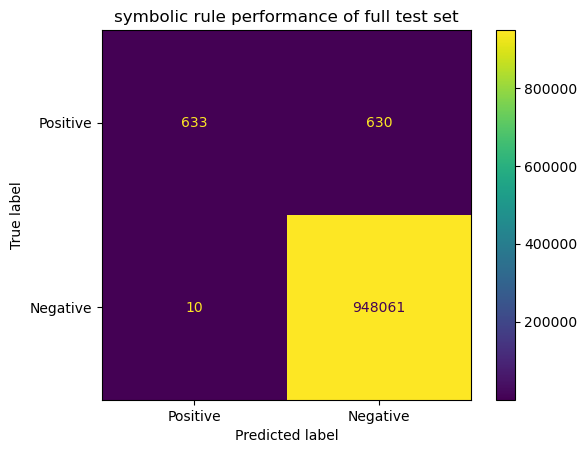

In [6]:
input_dir = '../examples/fraud-symb-full'
input_table=create_table(con,input_dir, 'df')
sql_sentence = \
'select "type_TRANSFER" and "external_dest" as "pred1",\n "deviation_from_max_7_days" and "pred1" as "isFraud",\n'

predicted_table=test_rule(con, sql_sentence, target_predicate="isFraud")
performance_metrics(predicted_table['isFraud'], input_table['isFraud'], labels=[True,False], title='symbolic rule performance of full train set')

input_table=create_table(con, input_dir, 'df_test')
predicted_table=test_rule(con, 'select "type_TRANSFER" and "external_dest" as "pred1",\n "deviation_from_max_7_days" and "pred1" as "isFraud",\n', target_predicate="isFraud")
performance_metrics(predicted_table['isFraud'], input_table['isFraud'], labels=[True,False], title='symbolic rule performance of full test set')

previous table dropped
Performance of symbolic rule performance of full train set
Accuracy: 0.999318
Precision TP/(TP+FP): 0.973846
Recall TP/(TP+FN): 0.501188
F1 Score: 0.661788
MCC Score: 0.698376


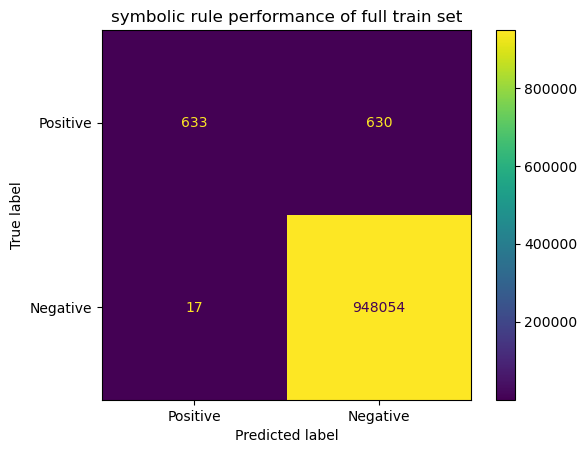

In [10]:
input_dir = '../examples/fraud-cart-short/'

input_table=create_table(con,input_dir, 'df_test')
sql_sentence = \
'select "{type_TRANSFER, 0.5}" and "{external_dest, 0.5}" as "pred8",  "pred8" and "{external_dest, 0.5}" as "pred7",  "NOT{type_TRANSFER, 0.5}" and "pred8" OR "pred7" and "{type_TRANSFER, 0.5}"  as "isFraud",'

predicted_table=test_rule(con, sql_sentence, target_predicate="isFraud")
performance_metrics(predicted_table['isFraud'], input_table['isFraud'], labels=[True,False], title='symbolic rule performance of full train set')
